<a href="https://colab.research.google.com/github/cryingjin/Today-I-Learned/blob/master/assignment1_datechart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-Clustering
앞으로 7-8월 간단한 NLP와 클러스터링, 그리고 bokeh를 통한 구현을 진행하는 것이 목표입니다. 잘되면 다른 데이터에 접목시켜보는 시간도 가져보아요 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd /content/drive/My Drive/Daewoong

/content/drive/My Drive/Daewoong


***
## Ready

In [5]:
# pandas 불러오기
import pandas as pd

In [6]:
# ready
import numpy as np
import glob
import json
from tqdm import tqdm
import pickle
import warnings
warnings.filterwarnings('ignore')

# visualize modules 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")
# plt.style.use('ggplot') 더 예쁜 seaborn 사용

## 1. Data Load
제가 캐글에 올라와 있는 metadata와 json 파일을 단순히 합쳐서 csv 파일로 만들어놨어요~ 13GB 가 1GB정도의 csv 파일이 되었습니다.  
단순히 csv 파일 불러오기 입니다!
다만 이 주피터노트북 파일과 같은 폴더에 파일을 넣고 불러와주세요!
  
csv 파일 이름은 df_covid 입니다~

In [7]:
# csv 파일 불러오기
df_covid = pd.read_csv('df_covid.csv')
df_covid.head(2)

## 2. Visualization
시간에 따른 논문 발행 갯수만 빠르게 시각화해봄 - 0724


In [9]:
# 현재 데이터 갯수
df_covid.shape

(63800, 9)

### Data handling

- 중복제거
- NA 제거
- 시간에 따른 시각화


In [11]:
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)
df_covid['abstract'].describe(include='all')
df_covid.shape    # (63639, 9)

(63639, 9)

In [12]:
# 한번에 모든 컬럼에 있는 NA 삭제하기
df_covid.dropna(inplace=True)
df_covid.info()    # 37957개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37957 entries, 0 to 63797
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          37957 non-null  object
 1   doi               37957 non-null  object
 2   abstract          37957 non-null  object
 3   body_text         37957 non-null  object
 4   publish_time      37957 non-null  object
 5   authors           37957 non-null  object
 6   title             37957 non-null  object
 7   journal           37957 non-null  object
 8   abstract_summary  37957 non-null  object
dtypes: object(9)
memory usage: 2.9+ MB


### Date Chart 그리기
시간에 따른 논문 발행 수를 체크해보자

In [49]:
# publsh_year 변수 생성
df_covid['publish_year'] = df_covid.publish_time.astype('datetime64').dt.year
#df_covid['publish_year'] = df_covid.publish_time.astype('datetime64').map(lambda x: x.strftime('%Y'))

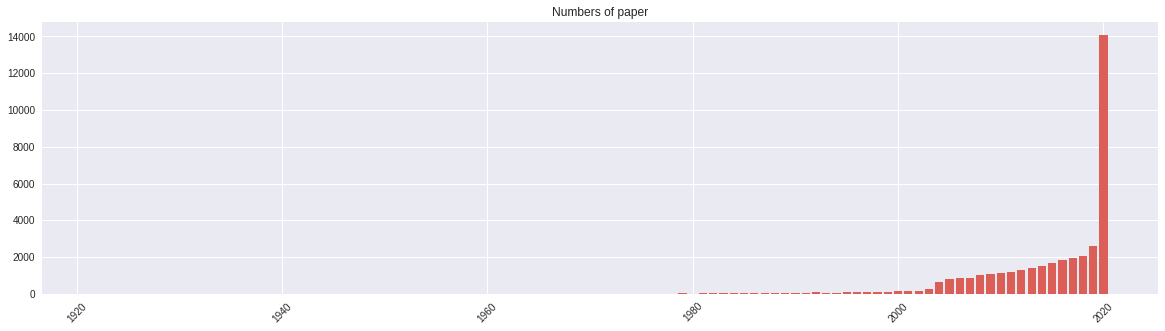

In [50]:
# 발행 숫자 체크
publish_count = df_covid['publish_year'].value_counts()
#publish_count = sorted(publish_count)
plt.figure(figsize=(20,5))
#plt.bar(publish_count.index, publish_count)
plt.bar(publish_count.index, publish_count)

plt.xticks(rotation=45)
plt.title('Numbers of paper',fontsize='large')
plt.show()

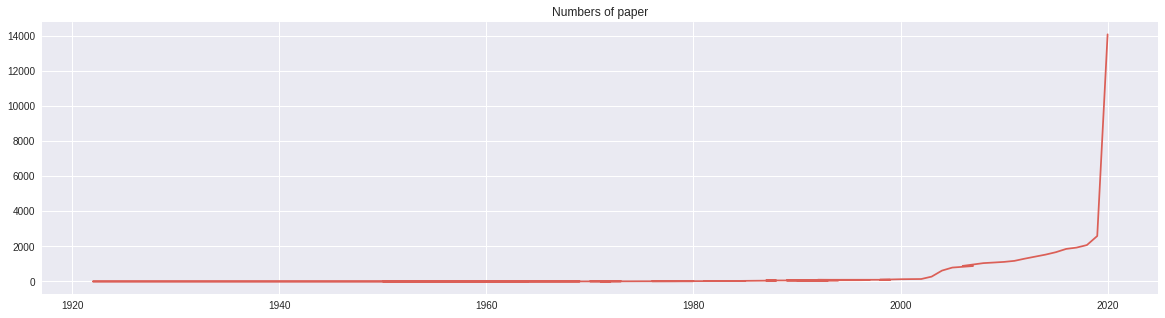

In [51]:
plt.figure(figsize=(20,5))
publish_count.plot(title = 'Numbers of paper')

In [56]:
p = df_covid.query("publish_time <'1970'")
p.shape

(5, 10)

1970년 이전 논문이 5개 있어서 저렇게 나옵니다. 기간을 70년 이후부터 최근으로 좁히고 다시 만들어보겠습니다.


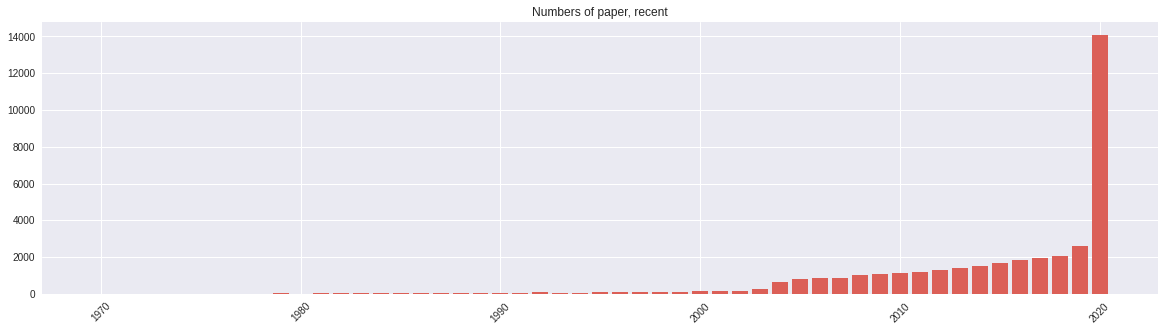

In [57]:
df_recent_paper = df_covid.query("publish_time >'1970'")

df_recent_paper_count = df_recent_paper['publish_year'].value_counts()
plt.figure(figsize=(20,5))
plt.bar(df_recent_paper_count.index, df_recent_paper_count)

plt.xticks(rotation=45)
plt.title('Numbers of paper, recent',fontsize='large')
plt.show()

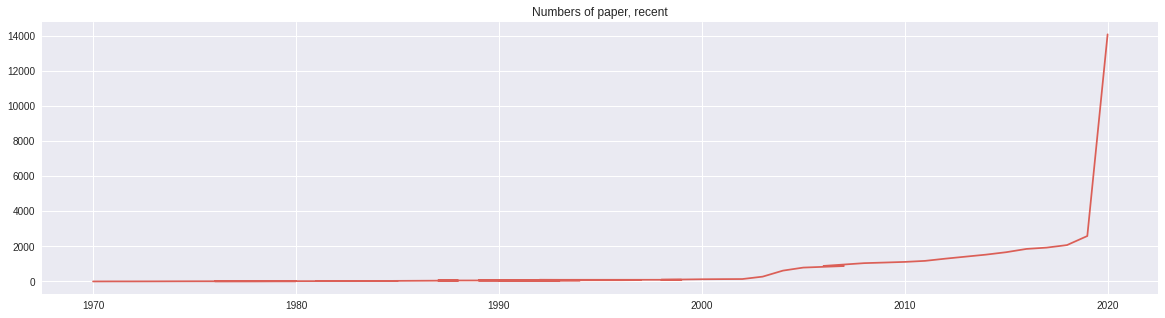

In [58]:
plt.figure(figsize=(20,5))
df_recent_paper_count.plot(title = 'Numbers of paper, recent')

제가 보기에 그냥 무난하고 딱히 큰 인사이트는 없는 것 같은데 어떠신가요?  
월별로 쪼개서도 해볼까요? (데이터에 월이 없는 것이 있어서 될지 모르겠음) 


# 3. Save
recent_data만 저장하겠습니다~! 

코드를 따라하고 싶으신 분들은 future_data나 past_data도 저장해보세요~

In [ ]:
# pickle 저장
with open('COVID19_assignment1_datechart.pickle','wb') as fw:
    pickle.dump(df_covid,fw)

# 고생하셨습니다~ 다음주 목요일에 뵙겠습니다!